In [ ]:
#https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip

In [1]:
import os
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from PIL import Image
import tensorflow as tf
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    ConfusionMatrixDisplay
)

def remove_file(path):
  if os.path.exists(path):
    try:
      os.remove(path)
    except PermissionError:
      print(f'Permission denied to delete{path}')
    except OSError:
      print(f'OS Error in {path}')

In [ ]:
URL = 'https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip'
path_to_zip = tf.keras.utils.get_file(
    'kagglecatsanddogs_5340.zip',
    origin=URL,
    extract=True,
    cache_dir='/content'
)

In [ ]:
!ls /content/datasets/kagglecatsanddogs_5340_extracted/PetImages/Dog


0.jpg	   11608.jpg  1966.jpg	3573.jpg  5180.jpg  6789.jpg  8396.jpg
10000.jpg  11609.jpg  1967.jpg	3574.jpg  5181.jpg  678.jpg   8397.jpg
10001.jpg  1160.jpg   1968.jpg	3575.jpg  5182.jpg  6790.jpg  8398.jpg
10002.jpg  11610.jpg  1969.jpg	3576.jpg  5183.jpg  6791.jpg  8399.jpg
10003.jpg  11611.jpg  196.jpg	3577.jpg  5184.jpg  6792.jpg  839.jpg
10004.jpg  11612.jpg  1970.jpg	3578.jpg  5185.jpg  6793.jpg  83.jpg
10005.jpg  11613.jpg  1971.jpg	3579.jpg  5186.jpg  6794.jpg  8400.jpg
10006.jpg  11614.jpg  1972.jpg	357.jpg   5187.jpg  6795.jpg  8401.jpg
10007.jpg  11615.jpg  1973.jpg	3580.jpg  5188.jpg  6796.jpg  8402.jpg
10008.jpg  11616.jpg  1974.jpg	3581.jpg  5189.jpg  6797.jpg  8403.jpg
10009.jpg  11617.jpg  1975.jpg	3582.jpg  518.jpg   6798.jpg  8404.jpg
1000.jpg   11618.jpg  1976.jpg	3583.jpg  5190.jpg  6799.jpg  8405.jpg
10010.jpg  11619.jpg  1977.jpg	3584.jpg  5191.jpg  679.jpg   8406.jpg
10011.jpg  1161.jpg   1978.jpg	3585.jpg  5192.jpg  67.jpg    8407.jpg
10012.jpg  11620.jpg  1979

In [ ]:
#Borrado de archivos (pueden ser archivos corruptos o sin informacion)
remove_file('/content/datasets/kagglecatsanddogs_5340_extracted/PetImages/Dog/11686.jpg')
remove_file('/content/datasets/kagglecatsanddogs_5340_extracted/PetImages/Dog/11702.jpg')
remove_file('/content/datasets/kagglecatsanddogs_5340_extracted/PetImages/Dog/Thumbs.db')
remove_file('/content/datasets/kagglecatsanddogs_5340_extracted/PetImages/Cat/5673.jpg')
remove_file('/content/datasets/kagglecatsanddogs_5340_extracted/PetImages/Cat/835.jpg')
remove_file('/content/datasets/kagglecatsanddogs_5340_extracted/PetImages/Cat/666.jpg')
remove_file('/content/datasets/kagglecatsanddogs_5340_extracted/PetImages/Cat/Thumbs.db')

In [ ]:
#Creacion de carpetas TRAIN VAL TEST con sus directorios para cats y dogs
original_cat_dir = '/content/datasets/kagglecatsanddogs_5340_extracted/PetImages/Cat' #Rutas originales de las imagenes
original_dog_dir = '/content/datasets/kagglecatsanddogs_5340_extracted/PetImages/Dog'

os.makedirs('/content/datasets/kagglecatsanddogs_5340_extracted/train', exist_ok=True)
os.makedirs('/content/datasets/kagglecatsanddogs_5340_extracted/val', exist_ok=True)
os.makedirs('/content/datasets/kagglecatsanddogs_5340_extracted/test', exist_ok=True)

os.makedirs('/content/datasets/kagglecatsanddogs_5340_extracted/train/cat', exist_ok=True)
os.makedirs('/content/datasets/kagglecatsanddogs_5340_extracted/train/dog', exist_ok=True)
os.makedirs('/content/datasets/kagglecatsanddogs_5340_extracted/val/cat', exist_ok=True)
os.makedirs('/content/datasets/kagglecatsanddogs_5340_extracted/val/dog', exist_ok=True)
os.makedirs('/content/datasets/kagglecatsanddogs_5340_extracted/test/cat', exist_ok=True)
os.makedirs('/content/datasets/kagglecatsanddogs_5340_extracted/test/dog', exist_ok=True)

In [ ]:
my_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
train_point = int(len(my_list)*0.75)
test_val_point = int(len(my_list)*(1-0.75))
train_file = my_list[:train_point]
print(train_point)
print(test_val_point)
val_file = my_list[train_point: train_point + int(test_val_point/2)]
test_file = my_list[train_point + int(test_val_point/2):]
print(train_file)
print(val_file)
print(test_file)

22
7
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
[23, 24, 25]
[26, 27, 28, 29, 30]


In [ ]:
def split_data(source_dir, train_dir, val_dir, test_dir, split_size=0.75):
  files = os.listdir(source_dir)
  random.shuffle(files)
  train_point = int(len(files)*split_size)
  test_val_point = int(len(files)*(1-split_size))
  train_file = files[:train_point]
  val_file = files[train_point:train_point + int(test_val_point/2)]
  test_file = files[train_point + int(test_val_point/2):]
  for file_name in train_file:
    shutil.copyfile(
        os.path.join(source_dir, file_name),
        os.path.join(train_dir, file_name)
    )
  for file_name in val_file:
    shutil.copyfile(
        os.path.join(source_dir, file_name),
        os.path.join(val_dir, file_name)
    )
  for file_name in test_file:
    shutil.copyfile(
        os.path.join(source_dir, file_name),
        os.path.join(test_dir, file_name)
    )

In [ ]:
split_data(original_cat_dir,
           '/content/datasets/kagglecatsanddogs_5340_extracted/train/cat',
           '/content/datasets/kagglecatsanddogs_5340_extracted/val/cat',
           '/content/datasets/kagglecatsanddogs_5340_extracted/test/cat')

In [ ]:
split_data(original_dog_dir,
           '/content/datasets/kagglecatsanddogs_5340_extracted/train/dog',
           '/content/datasets/kagglecatsanddogs_5340_extracted/val/dog',
           '/content/datasets/kagglecatsanddogs_5340_extracted/test/dog')

In [ ]:
!rm -rf /content/datasets/kagglecatsanddogs_5340_extracted

## Image theory

In [2]:
img = Image.open('/content/husky.jpeg')
my_array = np.array(img)

array([[ 68,  64,  61, ..., 127, 124, 131],
       [ 60,  56,  54, ..., 126, 124, 126],
       [ 58,  54,  53, ..., 123, 122, 125],
       ...,
       [ 21,  21,  21, ..., 202, 202, 201],
       [ 21,  21,  21, ..., 203, 202, 200],
       [ 21,  22,  22, ..., 202, 200, 197]], dtype=uint8)
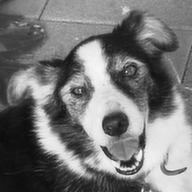

In [3]:
my_array

In [ ]:
my_array.shape

(192, 192)

In [ ]:
fig = go.Figure(data=[go.Surface(z=my_array)])
fig.show()

In [5]:
my_array = [[1,2],[3,4]]
# esta es una lista de listas, porque tiene una lista que contiene dos listas, la primera lista es 1,2 y la segunda es 3,4
for i in range(len(my_array)):
  for j in range(len(my_array[0])):
    print(my_array[i][j])

1
2
3
4


In [6]:
my_array[1][1]

4

In [12]:
simple = [[255,223,191],[159,127,95],[63,31,0]]
simple_array = np.array(simple,dtype='uint8')
simple_array

array([[255, 223, 191],
       [159, 127,  95],
       [ 63,  31,   0]], dtype=uint8)

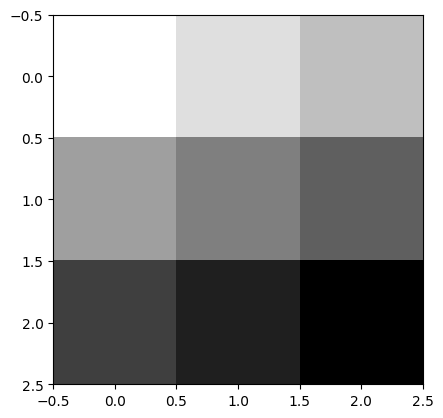

In [14]:
plt.imshow(simple_array, cmap='gray',vmin=0, vmax=255)
plt.show()

In [15]:
simple_array[::-1,:]

array([[ 63,  31,   0],
       [159, 127,  95],
       [255, 223, 191]], dtype=uint8)

In [16]:
simple_array[:,::-1]

array([[191, 223, 255],
       [ 95, 127, 159],
       [  0,  31,  63]], dtype=uint8)

In [25]:
img = Image.open('/content/husky.jpeg')
my_array = np.array(img)

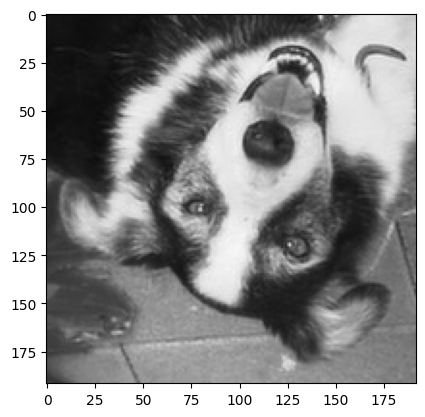

In [18]:
plt.imshow(my_array[::-1,:], cmap='gray', vmin=0, vmax=255)
plt.show()

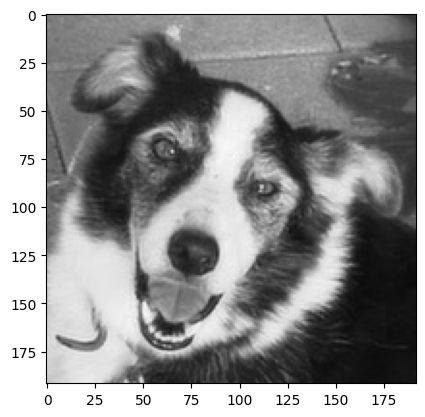

In [19]:
plt.imshow(my_array[:,::-1], cmap='gray', vmin=0, vmax=255)
plt.show()

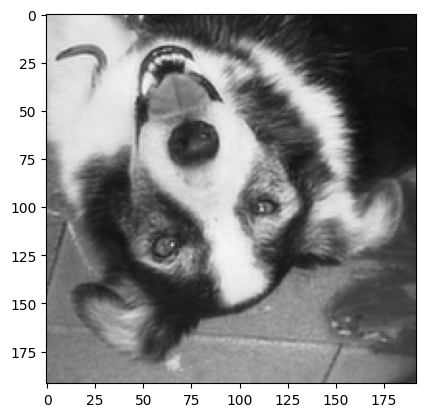

In [20]:
plt.imshow(my_array[::-1,::-1], cmap='gray', vmin=0, vmax=255)
plt.show()

In [21]:
my_array = [[1,2],[3,4]]
my_np_array = np.array(my_array)
my_np_array

array([[1, 2],
       [3, 4]])

In [22]:
my_sec_array = [[3,3],[3,4]]
my_np_sec_array = np.array(my_sec_array)
my_np_sec_array

array([[3, 3],
       [3, 4]])

In [23]:
my_np_array + my_np_sec_array

array([[4, 5],
       [6, 8]])

In [24]:
my_np_array + 2

array([[3, 4],
       [5, 6]])

In [26]:
img = Image.open('/content/husky.jpeg')
my_array = np.array(img)

In [27]:
my_array.shape

(192, 192)

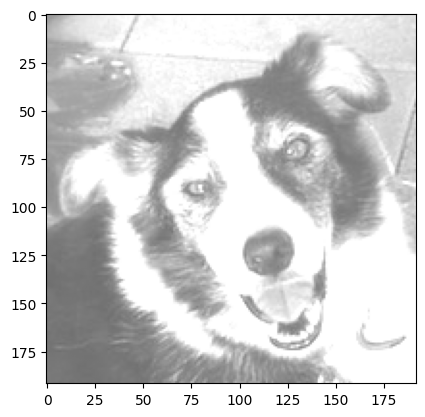

In [35]:
# proceso de iluminacion de imagenes
my_addition = []
component = 100
for i in range(len(my_array)):
  for j in range(len(my_array[0])):
    if int(my_array[i][j])+component > 255:
      my_addition.append(255)
    else:
      my_addition.append(int(my_array[i][j])+component)
resultant = np.array(my_addition, dtype='int16').reshape(192,192)
plt.imshow(resultant, cmap='gray', vmin=0, vmax=255)
plt.show()